## Problem Statement
In this activity, you are a member of an analytics team that provides insights to an investing firm. To help them decide which companies to invest in next, the firm wants insights into **unicorn companies**–companies that are valued at over one billion dollars. The data you will use for this task provides information on over 1,000 unicorn companies, including their industry, country, year founded, and select investors. You will use this information to gain insights into how and when companies reach this prestigious milestone and to make recommendations for next steps to the investing firm.


In [1]:
# importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import datetime as dt

In [2]:
data = pd.read_csv("Unicorn_Companies.csv")

In [3]:
data.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


# Describing the columns of the dataset
1. Company - Company name
2. Valuation - Company's valuation in Billion Dollars
3. Date Joined - The date in which the company reached $1 billion in valuation.
4. Industry - The industry that the company belongs to.
5. City - City the company was founded in.
6. Country/Region - Country the company was founded in.
7. Continent - Continent the company was founded in.
8. Year Founded - Year the company was founded
9. Funding - Total amount raised across all funding rounds i billions (B) or millions (M) of dollars
10. Select Investors - Top 4 investing firms or individual investors (some have less than 4)

In [5]:
print(f"Size of data is {data.size}")
print(f"Shape of data is {data.shape}")

Size of data is 10740
Shape of data is (1074, 10)


There are 1074 rows and 10 columns in this dataset. 

The Date Joined and Year Founded columns are both object Data Types at the moment. These need to be converted to datetime for further analysis.

In [13]:
# converting year founded and date joined columns into datetime
data['Date Joined'] = pd.to_datetime(data['Date Joined'])
data['Year Founded'] = data['Year Founded'].astype('int32')
# data['Year Founded'] = pd.to_datetime(data['Year Founded'], format="%Y")

C:\Users\sonim\AppData\Local\Temp\ipykernel_7000\4292172035.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date Joined'] = pd.to_datetime(data['Date Joined'])


In [14]:
# adding a year joined column to compare with year founded
data['Year Joined'] = data['Date Joined'].dt.year

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int32         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
 10  Year Joined       1074 non-null   int32         
dtypes: datetime64[ns](1), int32(2), object(8)
memory usage: 84.0+ KB


In [16]:
data.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


### Creating Samples of data using sample()

In [17]:
companies_sampled = data.sample(n=50, random_state=1)

### The time it took companies to reach unicorn status

In [18]:
companies_sampled.head(10).sort_values('Industry', ascending=True)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
531,Moveworks,$2B,2021-06-30,Artificial intelligence,Mountain View,United States,North America,2016,$305M,"Lightspeed Venture Partners, Sapphire Ventures...",2021
191,WeRide,$4B,2020-12-23,Auto & transportation,Guangzhou,China,Asia,2017,$1B,"Atop Capital, IDInvest Partners, Qiming Ventur...",2020
204,Articulate,$4B,2021-07-01,Edtech,New York,United States,North America,2015,$2B,"Blackstone, ICONIQ Growth, General Atlantic",2021
345,Outschool,$3B,2021-04-14,Edtech,San Francisco,United States,North America,2015,$240M,"Uniion Square Ventures, Tiger Global Managemen...",2021
80,Ramp,$8B,2021-03-29,Fintech,New York,United States,North America,2019,$660M,"D1 Capital Partners, Stripe, Coatue Management",2021
635,Qingting FM,$1B,2021-06-02,Internet software & services,Shanghai,China,Asia,2011,$164M,"China Culture Industrial Investment Fund, We C...",2021
428,Zenoti,$2B,2020-12-15,Internet software & services,Bellevue,United States,North America,2010,$331M,"Norwest Venture Partners, Accel, Tiger Global ...",2020
49,OutSystems,$10B,2018-06-05,Internet software & services,Boston,United States,North America,2001,$572M,"KKR, ES Ventures, North Bridge Growth Equity",2018
998,PicsArt,$1B,2021-08-26,Mobile & telecommunications,San Francisco,United States,North America,2011,$195M,"Sequoia Capital, DCM Ventures, Insight Partners",2021
354,Wildlife Studios,$3B,2019-12-05,Other,Sao Paulo,Brazil,South America,2011,$180M,"Benchmark, Bessemer Venture Partners",2019


In [19]:
companies_sampled['Time to Join'] = companies_sampled['Year Joined'] - companies_sampled['Year Founded']

In [20]:
companies_sampled.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Time to Join
635,Qingting FM,$1B,2021-06-02,Internet software & services,Shanghai,China,Asia,2011,$164M,"China Culture Industrial Investment Fund, We C...",2021,10
428,Zenoti,$2B,2020-12-15,Internet software & services,Bellevue,United States,North America,2010,$331M,"Norwest Venture Partners, Accel, Tiger Global ...",2020,10
49,OutSystems,$10B,2018-06-05,Internet software & services,Boston,United States,North America,2001,$572M,"KKR, ES Ventures, North Bridge Growth Equity",2018,17
204,Articulate,$4B,2021-07-01,Edtech,New York,United States,North America,2015,$2B,"Blackstone, ICONIQ Growth, General Atlantic",2021,6
998,PicsArt,$1B,2021-08-26,Mobile & telecommunications,San Francisco,United States,North America,2011,$195M,"Sequoia Capital, DCM Ventures, Insight Partners",2021,10


In [65]:
time_to_unicorn = companies_sampled.groupby(['Industry'])[['Time to Join']].max().sort_values(by="Time to Join")
time_to_unicorn = time_to_unicorn.reset_index()

In [66]:
time_to_unicorn.head(20)

,Industry,Time to Join
0,Consumer & retail,2
1,Auto & transportation,3
2,Hardware,3
3,Health,3
4,"Supply chain, logistics, & delivery",4
5,Artificial intelligence,5
6,Other,8
7,Edtech,10
8,Mobile & telecommunications,10
9,Internet software & services,17


In [45]:
time_to_unicorn.columns

Index(['Industry', 'Time to Join'], dtype='object')

In [68]:
time_to_unic_company = companies_sampled.loc[companies_sampled.groupby('Industry')['Time to Join'].idxmax(), ['Industry', 'Company', 'Time to Join']].sort_values(by="Time to Join")
time_to_unic_company = time_to_unic_company.reset_index()

In [69]:
time_to_unic_company

,index,Industry,Company,Time to Join
0,993,Consumer & retail,Pat McGrath Labs,2
1,191,Auto & transportation,WeRide,3
2,133,Hardware,Royole Corporation,3
3,81,Health,Tempus,3
4,41,"Supply chain, logistics, & delivery",Swiggy,4
5,531,Artificial intelligence,Moveworks,5
6,354,Other,Wildlife Studios,8
7,946,Edtech,JoyTunes,10
8,998,Mobile & telecommunications,PicsArt,10
9,49,Internet software & services,OutSystems,17


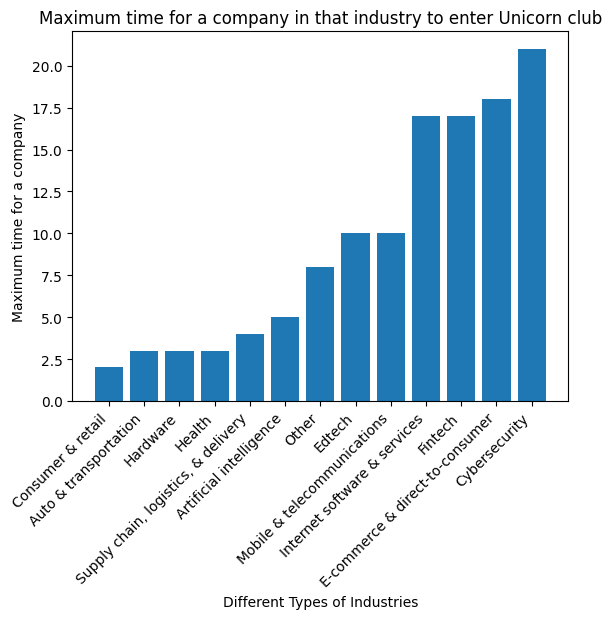

In [70]:
x = time_to_unic_company['Industry']
y = time_to_unic_company['Time to Join']

plt.bar(x,y, label = time_to_unic_company["Company"])
plt.xlabel("Different Types of Industries")
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel("Maximum time for a company")
plt.title("Maximum time for a company in that industry to enter Unicorn club")
plt.show()

This shows maximum time a company took in an industry to reach Unicorn club. This is not a comparison chart. 

Also, please note this is result from my sampled data which was randomly chosen. There is a possibility that companies might have been missed out which might have taken longer in other Industries. 

However, for the following chart: eSentire, a part of Cybersecurity industry took the maximum years, i.e. 21 to reach the Unicorn club, whereas Pat McGrath Labs from Consumer & retail only took 2 years. Based on this result we must not conclude if companies in general take more time in cybersecurity industries and consumer and retail companies reach unicorn clubs the fastest.

In [71]:
companies_sampled.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Time to Join
635,Qingting FM,$1B,2021-06-02,Internet software & services,Shanghai,China,Asia,2011,$164M,"China Culture Industrial Investment Fund, We C...",2021,10
428,Zenoti,$2B,2020-12-15,Internet software & services,Bellevue,United States,North America,2010,$331M,"Norwest Venture Partners, Accel, Tiger Global ...",2020,10
49,OutSystems,$10B,2018-06-05,Internet software & services,Boston,United States,North America,2001,$572M,"KKR, ES Ventures, North Bridge Growth Equity",2018,17
204,Articulate,$4B,2021-07-01,Edtech,New York,United States,North America,2015,$2B,"Blackstone, ICONIQ Growth, General Atlantic",2021,6
998,PicsArt,$1B,2021-08-26,Mobile & telecommunications,San Francisco,United States,North America,2011,$195M,"Sequoia Capital, DCM Ventures, Insight Partners",2021,10


In [85]:
companies_sampled["Num_Valuation"] = [companies_sampled["Valuation"].loc[x][1:-1] for x in companies_sampled.index]

In [86]:
companies_sampled.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Time to Join,Num_Valuation
635,Qingting FM,$1B,2021-06-02,Internet software & services,Shanghai,China,Asia,2011,$164M,"China Culture Industrial Investment Fund, We C...",2021,10,1
428,Zenoti,$2B,2020-12-15,Internet software & services,Bellevue,United States,North America,2010,$331M,"Norwest Venture Partners, Accel, Tiger Global ...",2020,10,2
49,OutSystems,$10B,2018-06-05,Internet software & services,Boston,United States,North America,2001,$572M,"KKR, ES Ventures, North Bridge Growth Equity",2018,17,10
204,Articulate,$4B,2021-07-01,Edtech,New York,United States,North America,2015,$2B,"Blackstone, ICONIQ Growth, General Atlantic",2021,6,4
998,PicsArt,$1B,2021-08-26,Mobile & telecommunications,San Francisco,United States,North America,2011,$195M,"Sequoia Capital, DCM Ventures, Insight Partners",2021,10,1


In [94]:
companies_sampled['Num_Valuation'] = companies_sampled['Num_Valuation'].astype('int32')

In [95]:
max_val = companies_sampled.groupby(["Industry"])[["Num_Valuation"]].max().sort_values("Num_Valuation",ascending=True)

In [98]:
max_val = max_val.reset_index()

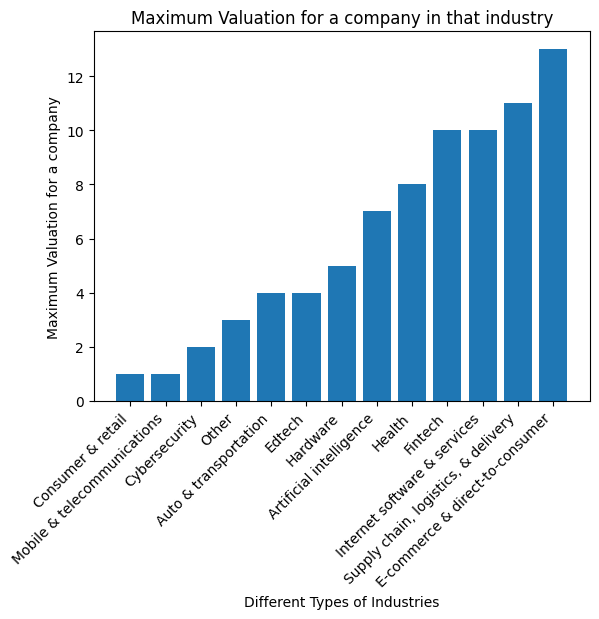

In [99]:
x = max_val['Industry']
y = max_val['Num_Valuation']

plt.bar(x,y)
plt.xlabel("Different Types of Industries")
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel("Maximum Valuation for a company")
plt.title("Maximum Valuation for a company in that industry")
plt.show()